## Creating CNN Using Scratch And Transfer Learning


In [2]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [3]:
import tensorflow as tf
print(tf.__version__)

2.13.0


In [4]:
# re-size all the images to this: based on images we have in dataset
IMAGE_SIZE = [224, 224]

train_path = 'cell_images/Train'
valid_path = 'cell_images/Test'

In [5]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

mobilnet = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

80134624/80134624 [==============================] - 17s 0us/step


In [6]:
# don't train existing weights
for layer in mobilnet.layers:
    layer.trainable = False

In [7]:
  # useful for getting number of output classes
folders = glob('Dataset/Train/*')

In [8]:
folders

['Dataset/Train\\Parasite', 'Dataset/Train\\Uninfected']

In [9]:
# our layers - you can add more if you want
x = Flatten()(mobilnet.output)

In [10]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=mobilnet.input, outputs=prediction)

In [11]:
# view the structure of the model
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [12]:
from tensorflow.keras.layers import MaxPooling2D

In [13]:
### Create Model from scratch using CNN
model=Sequential()
model.add(Conv2D(filters=16,kernel_size=2,padding="same",activation="relu",input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32,kernel_size=2,padding="same",activation ="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64,kernel_size=2,padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Flatten())
model.add(Dense(500,activation="relu"))
model.add(Dense(2,activation="softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 16)      208       
                                                                 
 max_pooling2d (MaxPooling2  (None, 112, 112, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 32)      2080      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 56, 56, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 64)        8256      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 28, 28, 64)        0

In [14]:
# model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [15]:
# Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [16]:
#same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('Dataset/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 416 images belonging to 2 classes.


In [17]:
training_set

In [18]:
test_set = test_datagen.flow_from_directory('Dataset/Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 70 images belonging to 2 classes.


In [20]:
# fit the model
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

C:\Users\tanav\AppData\Local\Temp\ipykernel_15956\4102162479.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/50
13/13 [==============================] - 15s 1s/step - loss: 1.6016 - accuracy: 0.5433 - val_loss: 0.8306 - val_accuracy: 0.3429
Epoch 2/50
13/13 [==============================] - 19s 1s/step - loss: 0.5931 - accuracy: 0.6635 - val_loss: 0.7969 - val_accuracy: 0.6000
Epoch 3/50
13/13 [==============================] - 17s 1s/step - loss: 0.5901 - accuracy: 0.6490 - val_loss: 0.8152 - val_accuracy: 0.5429
Epoch 4/50
13/13 [==============================] - 18s 1s/step - loss: 0.4994 - accuracy: 0.7308 - val_loss: 0.8919 - val_accuracy: 0.4000
Epoch 5/50
13/13 [==============================] - 17s 1s/step - loss: 0.5068 - accuracy: 0.7524 - val_loss: 0.9333 - val_accuracy: 0.5000
Epoch 6/50
13/13 [==============================] - 17s 1s/step - loss: 0.5618 - accuracy: 0.6923 - val_loss: 1.0655 - val_accuracy: 0.3000
Epoch 7/50
13/13 [==============================] - 17s 1s/step - loss: 0.5777 - accuracy: 0.7019 - val_loss: 0.7199 - val_accuracy: 0.5714
Epoch 8/50
13/13 [==

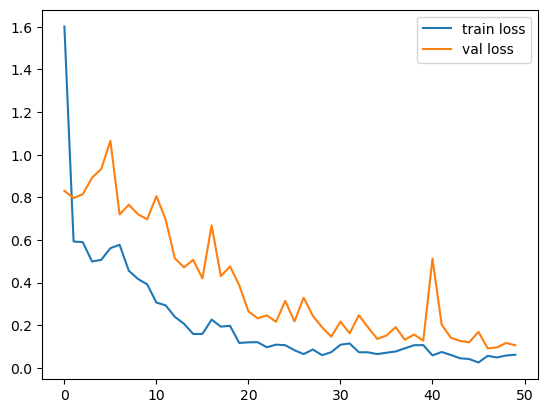

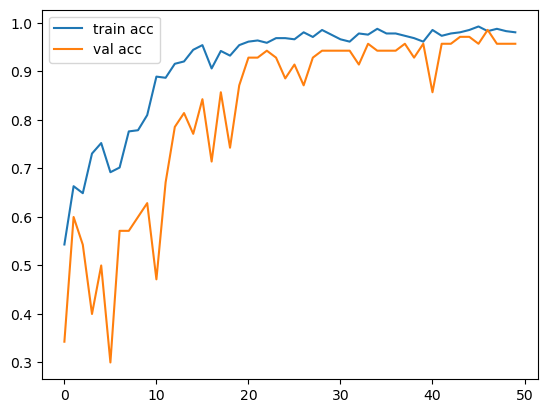

<Figure size 640x480 with 0 Axes>

In [21]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [22]:
# save it as a h5 file

from tensorflow.keras.models import load_model

model.save('model_vgg19.h5')

C:\Users\tanav\anaconda3\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [23]:
y_pred = model.predict(test_set)

3/3 [==============================] - 1s 96ms/step


In [24]:
y_pred

array([[3.49391736e-02, 9.65060830e-01],
       [2.25659043e-01, 7.74340987e-01],
       [3.83903719e-02, 9.61609602e-01],
       [9.99577940e-01, 4.22112760e-04],
       [7.37409992e-03, 9.92625892e-01],
       [1.00000000e+00, 3.94465309e-21],
       [1.22068161e-02, 9.87793148e-01],
       [3.34212859e-03, 9.96657848e-01],
       [9.96292531e-01, 3.70745361e-03],
       [1.58477113e-01, 8.41522872e-01],
       [2.12542266e-02, 9.78745818e-01],
       [1.20332897e-01, 8.79667044e-01],
       [7.00225355e-03, 9.92997766e-01],
       [9.62633073e-01, 3.73669341e-02],
       [2.97461808e-01, 7.02538192e-01],
       [3.45182745e-03, 9.96548235e-01],
       [1.02198571e-02, 9.89780068e-01],
       [8.34972024e-01, 1.65028036e-01],
       [9.93188381e-01, 6.81167282e-03],
       [1.18276468e-02, 9.88172352e-01],
       [7.45051727e-02, 9.25494790e-01],
       [1.00000000e+00, 4.92164418e-16],
       [2.55351309e-02, 9.74464893e-01],
       [3.64189260e-02, 9.63581026e-01],
       [1.000000

In [25]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [26]:
model=load_model('model_vgg19.h5')


In [30]:
img=image.load_img('Dataset/Test/Uninfected/2.png',target_size=(224,224))

In [31]:
x=image.img_to_array(img)
x

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

In [32]:
x.shape


(224, 224, 3)

In [33]:
x=x/255


In [34]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [35]:
model.predict(img_data)


1/1 [==============================] - 0s 156ms/step


array([[0., 1.]], dtype=float32)

In [36]:
a=np.argmax(model.predict(img_data), axis=1)


1/1 [==============================] - 0s 80ms/step


In [39]:
if(a==4):
    print("Uninfected")
else:
    print("Infected")

Infected
